<div style="border:solid green 2px; padding: 20px">
<b>Дмитрий, привет!</b>

Меня зовут Евгений Д., и я буду проверять твой проект. Предлагаю общаться на «ты» 😊 Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных. Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b> Так выделены небольшие замечания. Одна-два таких замечания в проекте допустимы, но если их будет больше - тебе будет необходимо внести исправления. Это как тестовое задание при приеме на работу: очень много мелких ошибок могут стать причиной отказа кандидату. 

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Здорово, когда есть вступление в сам проект, каждый сможет быстрее разобраться с тем о чем сам проект. Можно также привести краткий план проведения самой работы и описание используемых столбцов. 

</div>

# Первичное изучение данных

Импортируем необходимые библиотеки и прочитаем файл с данными

In [1]:
import pandas 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
try:
    df=pd.read_csv('real_estate_data.csv', sep='\t', decimal=',') 
except: 
    df=pd.read_csv('/datasets/real_estate_data.csv', sep='\t', decimal=',')

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>

<s>Поправь пожалуйста ошибку в коде, чтобы я смог проверить проект дальше.
    
Рекомендую перед отправкой проекта запустить весь проект целиком, чтобы не возникло дополнительных ошибок.
    
Рекомендую делать связку `try – except`, где мы разместим пути на сервере и локальной машине, тем самым избежим подобной ошибки. 
    
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
Добрый день, Дмитрий! Я тоже Дмитрий будем знакомы. Спасибо за проверку моей работы. 
Добавил конструкцию try – except с путем к файлу локально и на сервере </div>

Выведем общую информацию и несколько строк датасета

In [2]:
df.info()
display(df.head())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null object
total_area              23699 non-null object
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null object
floors_total            23613 non-null object
living_area             21796 non-null object
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null object
balcony                 12180 non-null object
locality_name           23650 non-null object
airports_nearest        18157 non-null object
cityCenters_nearest     18180 non-null object
parks_around3000        18181 non-null object
parks_nearest           8079 non-null object
ponds_around3000        18

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


,total_images,rooms,floor
count,23699.000000,23699.000000,23699.000000
mean,9.858475,2.070636,5.892358
std,5.682529,1.078405,4.885249
min,0.000000,0.000000,1.000000
25%,6.000000,1.000000,2.000000
50%,9.000000,2.000000,4.000000
75%,14.000000,3.000000,8.000000
max,50.000000,19.000000,33.000000


### Вывод 1

1. Датафрейм содержит 23699 строк и 21 столбец.
2. Данные хранятся в трех типах данных - bool(2), int64(3) и object(17)
3. В некоторых колонках огромное количетсво пропусков, например  в столбцах is_apartment и parks_nearest 
4. В некоторых столбцах данные имеют тип object, но при этом в колонках логично ожидать только числовые значения, например, last_price.  
5. В данных имеется столбец с датами. 

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Достаточно детально изучили наши первичные данные, давай теперь их обработаем. 
</div>

# Предобработка данных

Изменим тип данных в столбцах last_price и total_area, чтобы можно было проводить с данными математические операции

In [3]:
df['last_price'] = pd.to_numeric(df['last_price'], errors='coerce')
print(df['last_price'].dtypes)
df['total_area'] = pd.to_numeric(df['total_area'], errors='coerce')
print(df['total_area'].dtypes)

float64
float64


Выведем названия столбцов

In [4]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Исправим названия столбцов

In [5]:
df.set_axis(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_Centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],axis = 'columns',inplace = True)

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Кстати есть метод `rename`, с помощью которого можно заменить название нужного столбца например.
    
</div>

Выведем названия столбцов после исправления

In [6]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_Centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Создадим функию для подсчета суммы уникальных значений столбца

In [7]:
def column_unique (data, column_name):
    summ_unique=data.value_counts().sum()
    print('Количество уникальных значений столбца', column_name, '-', summ_unique)
    print()

Определим количество  пропусков в данных 

In [8]:
def pass_sum (data, column_name):
    pass_column=data.isna().sum()
    print('Количество пропущенных значений в столбце', column_name, '-', pass_column)
    print()
pass_sum(df['total_images'], 'total_images' )
pass_sum(df['last_price'], 'last_price' )
pass_sum(df['total_area'], 'total_area' )
pass_sum(df['first_day_exposition'], 'first_day_exposition' )
pass_sum(df['rooms'], 'rooms' )
pass_sum(df['ceiling_height'], 'ceiling_height' )
pass_sum(df['floors_total'], 'floors_total' )
pass_sum(df['living_area'], 'living_area' )
pass_sum(df['floor'], 'floor' )
pass_sum(df['is_apartment'], 'is_apartment' )
pass_sum(df['studio'], 'studio' )
pass_sum(df['open_plan'], 'open_plan' )
pass_sum(df['kitchen_area'], 'kitchen_area' )
pass_sum(df['balcony'], 'balcony' )
pass_sum(df['locality_name'], 'locality_name' )
pass_sum(df['airports_nearest'], 'airports_nearest' )
pass_sum(df['city_Centers_nearest'], 'city_Centers_nearest' )
pass_sum(df['parks_around_3000'], 'parks_around_3000' )
pass_sum(df['parks_nearest'], 'parks_nearest' )
pass_sum(df['ponds_around_3000'], 'ponds_around_3000' )
pass_sum(df['ponds_nearest'], 'ponds_nearest' )
pass_sum(df['days_exposition'], 'days_exposition' )


Количество пропущенных значений в столбце total_images - 0

Количество пропущенных значений в столбце last_price - 0

Количество пропущенных значений в столбце total_area - 0

Количество пропущенных значений в столбце first_day_exposition - 0

Количество пропущенных значений в столбце rooms - 0

Количество пропущенных значений в столбце ceiling_height - 9195

Количество пропущенных значений в столбце floors_total - 86

Количество пропущенных значений в столбце living_area - 1903

Количество пропущенных значений в столбце floor - 0

Количество пропущенных значений в столбце is_apartment - 20924

Количество пропущенных значений в столбце studio - 0

Количество пропущенных значений в столбце open_plan - 0

Количество пропущенных значений в столбце kitchen_area - 2278

Количество пропущенных значений в столбце balcony - 11519

Количество пропущенных значений в столбце locality_name - 49

Количество пропущенных значений в столбце airports_nearest - 5542

Количество пропущенных значений в ст

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Интересный метод проверки пропущенных значений 👍
    
В том числе можно было бы попробовать использовать эту функцию с помощью цикла. 
    
</div>

### Отработаем пропуски в столбце ceiling_height. 

Для того, чтобы получить возможность проводить арифметические операции с данными изменим их тип. 

In [9]:
df['ceiling_height'] = pd.to_numeric(df['ceiling_height'], errors='coerce')
print(df['ceiling_height'].dtypes)
print(df['ceiling_height'].value_counts())
column_unique(df['ceiling_height'], 'ceiling_height')

float64
2.50      3515
2.60      1646
2.70      1574
3.00      1112
2.80       993
          ... 
27.50        1
5.00         1
3.59         1
4.80         1
100.00       1
Name: ceiling_height, Length: 183, dtype: int64
Количество уникальных значений столбца ceiling_height - 14504



Изучим данные в столбце ceiling_height более подробно. Вероятно, что помещения с потолками более 6 м квартирами не являются, поэтому лучше их удалить. 

In [10]:
print(df['ceiling_height'].describe())
ceiling_height_BIG = df[df['ceiling_height']>6]['ceiling_height']
print("Количество квартир с потолками более 6 м:", ceiling_height_BIG.unique())

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64
Количество квартир с потолками более 6 м: [ 25.   32.    8.   27.   24.   26.    8.3  14.   20.   22.6  27.5  10.3
 100. ]


Таких квартир немного, но есть очень большие значения, которые могут влиять на средние показатели. Удалим эти данные
и выведем статистику по столбцу еще раз. 

In [11]:
df.drop(df[df['ceiling_height'] >6].index, inplace=True)
print(df['ceiling_height'].describe())

count    14475.000000
mean         2.726502
std          0.279452
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max          6.000000
Name: ceiling_height, dtype: float64


<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>

Я бы рекомендовал не использовать атрибут `inplace`, так как в последующих обновлениях библотеки `pandas` он будет удален.
    
Лучше всего переопределять переменные. 
    
</div>

Квартиры с потолками 6 м достаточно шикарны, но это уже выглядит разумно. В целом среднее значение достаточно хорошо 
характеризует выборку данных в столбце ceiling_height, поэтому заменим пропущенные значения в этом столбце средним. 

In [12]:
df['ceiling_height']=df['ceiling_height'].fillna(df['ceiling_height'].mean())
print('Количество пропусков в столбце после их замены на средние', df['ceiling_height'].isnull().sum())

Количество пропусков в столбце после их замены на средние 0


### Отработаем пропуски в столбце floors_total. 

Их количество очень мало по сравнению с количеством данных в столбце, но в данных могут быть аномальные значения.

In [13]:
print(df['floors_total'].describe())

count     23584
unique       36
top         5.0
freq       5776
Name: floors_total, dtype: object


Этажи не могут быть дробными числами, поэтому заменим тип данных в столбце floors_total на int8

In [14]:
df['floors_total'] = pd.to_numeric(df['floors_total'])
print(df['floors_total'].dtypes)
df['floors_total']=df['floors_total'].astype('Int8')
print(df['floors_total'].dtypes)
print(df['floors_total'].value_counts())

float64
Int8
5     5776
9     3759
16    1373
12    1362
4     1199
10    1173
25    1074
6      913
17     832
3      667
7      592
14     551
18     505
24     468
8      390
2      381
15     365
23     352
19     339
22     286
20     271
13     229
11     203
27     164
21     158
26     124
1       25
35      24
28      21
36       2
34       1
60       1
33       1
37       1
29       1
52       1
Name: floors_total, dtype: int64


Значения количества этажей разумны, а пропуски можно заменить на наиболее часто повторяющееся значение - 5.
Учитывая небольшое количество пропусков это ни на что не повлияет. 

In [15]:
df['floors_total']=df['floors_total'].fillna(5)
print(df['floors_total'].isnull().sum())

0


### Отработаем пропуски в столбце living_area. 

Несмотря на то, что количество пропусков в этом столбце относительно невелико значения в нем очень важны, так как жилая площадь 
квартиры основной фактор влияющий на ее цену. 

In [16]:
print(df['living_area'].describe())

count     21767
unique     1782
top        18.0
freq        882
Name: living_area, dtype: object


Для получения возможности проведения арифметических операций с данными заменим тип данных в столбце на float

In [17]:
df['living_area'] = pd.to_numeric(df['living_area'])
print(df['living_area'].dtypes)
print(df['living_area'].value_counts())
print(df['living_area'].describe())

float64
18.00    882
17.00    673
30.00    595
16.00    486
20.00    480
        ... 
20.03      1
10.55      1
24.83      1
20.97      1
15.55      1
Name: living_area, Length: 1782, dtype: int64
count    21767.00000
mean        34.46172
std         22.03924
min          2.00000
25%         18.60000
50%         30.00000
75%         42.30000
max        409.70000
Name: living_area, dtype: float64


Разброс данных достаточно большой. Выведем диаграмму 'ящик с усами' для оценки какие величины считать выбросами 

Text(0.5, 0, 'Количество квартир')

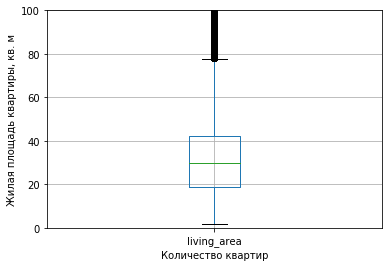

In [18]:
df.boxplot('living_area')
plt.ylim(0, 100)
plt.ylabel("Жилая площадь квартиры, кв. м")
plt.xlabel("Количество квартир")

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Кстати для того чтобы подписать график мы можем использовать метод `plt.title()` или атрибут `title=` в методе `hist`.
</div>

Из диаграммы видно, что основное количество квартир имеет жилую площадь 20-40 кв. м., что выглядит вполне разумным.
При этом есть довольно большое количество квартир с жилой площадью более 80 кв. м и небольшое количество квартир с жилой 
площадью около 2 кв. м. Оценим количество квартир с жилой площадью более 80 кв. м и менее 20 кв. м. 

In [19]:
print('Количество квартир с жилой площадью более 80 кв. м -', df[df['living_area']>80]['living_area'].count())
print('Количество квартир с жилой площадью менее 15 кв. м -', df[df['living_area']<15]['living_area'].count())

Количество квартир с жилой площадью более 80 кв. м - 686
Количество квартир с жилой площадью менее 15 кв. м - 704


Количество очень маленьких квартир, как и количество очень больших невелико, поэтому они не смогут сильно повлиять на общие 
данные. Думаю в данном случае уместно заменить пропуски на медианные значения по выборке. 

In [20]:
df['living_area']=df['living_area'].fillna(df['living_area'].median())
print('Количество пропусков в столбце после их замены на медиану', df['living_area'].isnull().sum())

Количество пропусков в столбце после их замены на медиану 0


### Отработаем пропуски в столбце 'is_apartament'. 

Количество пропусков в этом столбце очень большое и логично предположить, что в большинстве случаев люди продают обычные 
квартиры и просто не указывают, что это обычная квартира, поэтому наиболее разумно заполнить все пропуски значением False

In [21]:
print(df['is_apartment'].unique())
print(df['is_apartment'].dtypes)
df['is_apartment']=df['is_apartment'].astype('bool')
df['is_apartment']=df['is_apartment'].fillna(False)
print('Количество пропусков в столбце после их замены на False -', df['is_apartment'].isnull().sum())

[nan False True]
object
Количество пропусков в столбце после их замены на False - 0


### Отработаем пропуски в столбце 'kitchen_area' 

Вначале изменим тип данных для возможности работы с ними

In [22]:
df['kitchen_area'] = pd.to_numeric(df['kitchen_area'])
print(df['kitchen_area'].dtypes)
print(df['kitchen_area'].dtypes)
print(df['kitchen_area'].value_counts())

float64
float64
6.00     1300
10.00    1261
8.00     1107
9.00     1098
7.00     1060
         ... 
18.07       1
28.20       1
37.90       1
9.51        1
35.40       1
Name: kitchen_area, Length: 971, dtype: int64


Пропусков в этом столбце совсем немного и разумно предположить, что площадь кухни зависит от общей площади квартиры. 
Для проверки этого предположения проверим кореляцию между значениями этил столбцов.

In [23]:
print(df['kitchen_area'].describe())
print(df['kitchen_area'].corr(df['living_area']))

count    21398.000000
mean        10.571434
std          5.907801
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64
0.41774718499033353


Кореляция между значениями не такая сильная, как может показаться на первый взгляд, поэтому лучше оставить пропущенные значения
в этом столбце, так как не ясно каким образом их заполнять. 

### Обработаем пропуски в столбце balcony. 

Логично предположить, что раз люди не указывают количество балконов, значит их нет. Заменим пропуски в этом столбце на 0. 

In [24]:
print(df['balcony'].value_counts())
df['balcony']=df['balcony'].fillna(0) 
pass_sum(df['balcony'], 'balcony')


1.0    4188
0.0    3758
2.0    3650
5.0     301
4.0     182
3.0      81
Name: balcony, dtype: int64
Количество пропущенных значений в столбце balcony - 0



Кроме значения 0 в столбце есть значения 0.0, которое является его налогом. Заменим эти значения также на 0.

In [25]:
df['balcony'] = pd.to_numeric(df['balcony'])
print(df['balcony'].dtypes)
df['balcony']=df['balcony'].astype('int8')
print(df['balcony'].dtypes)
print(df['balcony'].value_counts())

float64
int8
0    15268
1     4188
2     3650
5      301
4      182
3       81
Name: balcony, dtype: int64


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

В том числе метод `fillna` и `astype` можно применять к нескольким столбцам одновременно.
    
Если столбцов более 2–ух, то рекомендую применять цикл `for`.
    
</div>

### Отработаем пропуски в столбце 'locality_name' 

Количество пропусков в этом столбце очень мало, но учитывая, что исследование проводится для Санкт-Петербурга заполним эти пропуски для порядка на Санкт-Петербург

In [26]:
print(df['locality_name'].value_counts())
df['locality_name']=df['locality_name'].fillna('Санкт-Петербург') 
pass_sum(df['locality_name'], 'locality_name')

Санкт-Петербург                   15704
посёлок Мурино                      520
посёлок Шушары                      440
Всеволожск                          398
Пушкин                              369
                                  ...  
деревня Тихковицы                     1
поселок станции Лужайка               1
поселок городского типа Рябово        1
поселок станции Корнево               1
деревня Старое Хинколово              1
Name: locality_name, Length: 363, dtype: int64
Количество пропущенных значений в столбце locality_name - 0



### Отработаем пропуски в столбце airports_nearest

Вначале изменим тип данных 

In [27]:
df['airports_nearest'] = pd.to_numeric(df['airports_nearest'])
print(df['airports_nearest'].dtypes)

float64


Посчитаем количество пропусков

In [28]:
print(df['airports_nearest'].value_counts())

37434.0    61
21928.0    32
39946.0    30
44870.0    30
37407.0    27
           ..
46254.0     1
11092.0     1
8099.0      1
35587.0     1
23014.0     1
Name: airports_nearest, Length: 8267, dtype: int64


Выведем общие данные по столбцу и диграмму "ящик с усами"

Text(0.5, 0, 'Количество квартир')

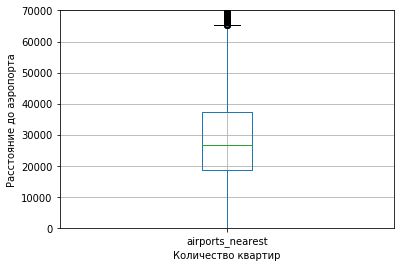

In [29]:
df['airports_nearest'].describe()
df.boxplot('airports_nearest')
plt.ylim(0, 70000)
plt.ylabel("Расстояние до аэропорта")
plt.xlabel("Количество квартир")

Колебания по расстоянию до эропорта достаточно большие, от 7000 до менее 2000. При этом основная часть квартир находится
на расстоянии от аэропорта в пределах 2000-3800. 

Заполнить все средним или медианой кажется не слишком разумным решением. Лучше заполнить пропуски средним по значениям 
населенного пункта.Создадим словарь со значениями место - расстояние до аэропорта. 

In [30]:
airport_nearest_median = dict(df.pivot_table(index = 'locality_name', 
                                             values = 'airports_nearest', aggfunc = 'median')['airports_nearest'])
airport_nearest_median2=dict(df.pivot_table(index = 'locality_name', 
                                             values = 'airports_nearest')['airports_nearest'])
display(airport_nearest_median2)
airport_nearest_median==airport_nearest_median2

{'Зеленогорск': 73300.25,
 'Колпино': 26375.86350148368,
 'Красное Село': 26606.765714285713,
 'Кронштадт': 67453.79787234042,
 'Ломоносов': 48308.280303030304,
 'Павловск': 21053.342105263157,
 'Петергоф': 40184.67661691542,
 'Пушкин': 16447.869918699187,
 'Санкт-Петербург': 28040.40357598978,
 'Сестрорецк': 56640.48633879781,
 'поселок Лисий Нос': 55930.0,
 'поселок Мурино': 51553.0,
 'посёлок Александровская': 12896.5,
 'посёлок Белоостров': 57769.0,
 'посёлок Левашово': 52693.0,
 'посёлок Лисий Нос': 54988.5,
 'посёлок Металлострой': 25726.484848484848,
 'посёлок Молодёжное': 84430.2,
 'посёлок Парголово': 53994.92660550459,
 'посёлок Песочный': 54565.5,
 'посёлок Петро-Славянка': 20605.0,
 'посёлок Понтонный': 30581.4,
 'посёлок Репино': 62293.25,
 'посёлок Сапёрный': 34142.666666666664,
 'посёлок Стрельна': 28148.363636363636,
 'посёлок Усть-Ижора': 26510.5,
 'посёлок Шушары': 16061.45871559633,
 'посёлок Щеглово': 61908.0}

False

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

У датафреймов есть метод `to_dict`, который можно использовать как альтернативный способ. 
    
</div>

Словари неравны, следовательно в одних и тех же населенных пунктах расстояния до эропорта могут быть записаны по-разному.
Будем использовать словарь с медианными значениями. Создадим функцию для замены пропусков в столбце. 

In [31]:
df['airports_nearest']=df['airports_nearest'].fillna(df['locality_name'].map(airport_nearest_median))
pass_sum(df['airports_nearest'], 'airports_nearest')

Количество пропущенных значений в столбце airports_nearest - 5376



Оставшиеся пропуски оставим как есть. Посмотрим, что с ними делать дальше. 

### Отработаем пропуски в столбце city_Centers_nearest 

Вначале изменим тип данных

In [32]:
df['city_Centers_nearest'] = pd.to_numeric(df['city_Centers_nearest'])
print(df['city_Centers_nearest'].dtypes)

float64


In [33]:
city_Centers_nearest_median = dict(df.pivot_table(index = 'locality_name', 
                                             values = 'city_Centers_nearest', aggfunc = 'median')['city_Centers_nearest'])
display(city_Centers_nearest_median)

{'Зеленогорск': 53381.0,
 'Колпино': 32018.0,
 'Красное Село': 29142.0,
 'Кронштадт': 49572.5,
 'Ломоносов': 51677.0,
 'Павловск': 32683.0,
 'Петергоф': 33771.0,
 'Пушкин': 27930.5,
 'Санкт-Петербург': 12243.0,
 'Сестрорецк': 34821.0,
 'поселок Лисий Нос': 28246.0,
 'поселок Мурино': 21888.0,
 'посёлок Александровская': 27468.0,
 'посёлок Белоостров': 38868.0,
 'посёлок Левашово': 25727.0,
 'посёлок Лисий Нос': 27297.0,
 'посёлок Металлострой': 27602.0,
 'посёлок Молодёжное': 65764.0,
 'посёлок Парголово': 19311.0,
 'посёлок Песочный': 26099.5,
 'посёлок Петро-Славянка': 27165.0,
 'посёлок Понтонный': 32354.0,
 'посёлок Репино': 42896.5,
 'посёлок Сапёрный': 35859.5,
 'посёлок Стрельна': 23506.0,
 'посёлок Усть-Ижора': 28222.5,
 'посёлок Шушары': 24212.0,
 'посёлок Щеглово': 34085.0}

Заменим пропуски в столбце на медианные значения по месту

In [34]:
df['city_Centers_nearest']=df['city_Centers_nearest'].fillna(df['locality_name'].map(city_Centers_nearest_median))
pass_sum(df['city_Centers_nearest'], 'city_Centers_nearest')

Количество пропущенных значений в столбце city_Centers_nearest - 5376



Остальные пропуски пока не трогаем. 

### Отработаем пропуски в столбце parks_around_3000

In [35]:
df['parks_around_3000'] = pd.to_numeric(df['parks_around_3000'])
print(df['parks_around_3000'].dtypes)

float64


In [36]:
parks_around_3000_median = dict(df.pivot_table(index = 'locality_name', 
                                             values = 'parks_around_3000', aggfunc = 'median')['parks_around_3000'])
display(parks_around_3000_median)

{'Зеленогорск': 3.0,
 'Колпино': 0.0,
 'Красное Село': 0.0,
 'Кронштадт': 2.0,
 'Ломоносов': 0.0,
 'Павловск': 2.0,
 'Петергоф': 1.0,
 'Пушкин': 1.0,
 'Санкт-Петербург': 0.0,
 'Сестрорецк': 0.0,
 'поселок Лисий Нос': 0.0,
 'поселок Мурино': 0.0,
 'посёлок Александровская': 0.0,
 'посёлок Белоостров': 0.0,
 'посёлок Левашово': 0.0,
 'посёлок Лисий Нос': 0.0,
 'посёлок Металлострой': 0.0,
 'посёлок Молодёжное': 0.0,
 'посёлок Парголово': 0.0,
 'посёлок Песочный': 0.0,
 'посёлок Петро-Славянка': 0.0,
 'посёлок Понтонный': 0.0,
 'посёлок Репино': 0.0,
 'посёлок Сапёрный': 0.0,
 'посёлок Стрельна': 0.0,
 'посёлок Усть-Ижора': 0.0,
 'посёлок Шушары': 0.0,
 'посёлок Щеглово': 0.0}

In [37]:
df['parks_around_3000']=df['parks_around_3000'].fillna(df['locality_name'].map(parks_around_3000_median))
pass_sum(df['parks_around_3000'], 'parks_around_3000')

Количество пропущенных значений в столбце parks_around_3000 - 5376



### Отработаем пропуски в столбце parks_nearest

Судя по названию этот столбец похож на предыдущий, но значения там разные. В этом столбце огромное количество пропусков. 
Видимо там где парка рядом нету люди просто ничего не пишут, поэтому имеет смысл просто заменить все эти пропуски на 0. 
Учитывая, что у нас есть предыдущие столбцы это особо нп повлияет на последующий анализ. 

In [38]:
df['parks_nearest']=df['parks_nearest'].fillna(0)
pass_sum(df['parks_nearest'], 'parks_nearest')

Количество пропущенных значений в столбце parks_nearest - 0



### Отработаем пропуски в столбце ponds_around_3000

Заменим тип данных

In [39]:
df['ponds_around_3000'] = pd.to_numeric(df['ponds_around_3000'])
print(df['ponds_around_3000'].dtypes)

float64


In [40]:
ponds_around_3000_median = dict(df.pivot_table(index = 'locality_name', 
                                             values = 'ponds_around_3000', aggfunc = 'median')['ponds_around_3000'])
display(ponds_around_3000_median)

{'Зеленогорск': 1.0,
 'Колпино': 1.0,
 'Красное Село': 0.0,
 'Кронштадт': 2.0,
 'Ломоносов': 1.0,
 'Павловск': 2.0,
 'Петергоф': 1.0,
 'Пушкин': 0.0,
 'Санкт-Петербург': 1.0,
 'Сестрорецк': 1.0,
 'поселок Лисий Нос': 0.0,
 'поселок Мурино': 2.0,
 'посёлок Александровская': 1.0,
 'посёлок Белоостров': 1.0,
 'посёлок Левашово': 0.0,
 'посёлок Лисий Нос': 0.0,
 'посёлок Металлострой': 0.0,
 'посёлок Молодёжное': 0.0,
 'посёлок Парголово': 0.0,
 'посёлок Песочный': 0.0,
 'посёлок Петро-Славянка': 2.0,
 'посёлок Понтонный': 0.0,
 'посёлок Репино': 0.0,
 'посёлок Сапёрный': 1.0,
 'посёлок Стрельна': 1.0,
 'посёлок Усть-Ижора': 0.0,
 'посёлок Шушары': 0.0,
 'посёлок Щеглово': 0.0}

Заменим пропуски в столбце на медианные значения по месту

In [41]:
df['ponds_around_3000']=df['ponds_around_3000'].fillna(df['locality_name'].map(ponds_around_3000_median))
pass_sum(df['ponds_around_3000'], 'ponds_around_3000')

Количество пропущенных значений в столбце ponds_around_3000 - 5376



### Отработаем пропуски в столбце ponds_nearest

Учитывая болшое количество пропусков и схожие данные со столбцов ponds_around_3000 можно заменить пропуски на 0

In [42]:
df['ponds_nearest']=df['ponds_nearest'].fillna(0)
pass_sum(df['ponds_nearest'], 'ponds_nearest')

Количество пропущенных значений в столбце ponds_nearest - 0



### Отработаем пропуски в days_exposition

Даные в этом столбце вначале нужно привезти к числовому типу

In [43]:
df['days_exposition'] = pd.to_numeric(df['days_exposition'])
print(df['days_exposition'].dtypes)

float64


In [44]:
df['days_exposition'].describe()

count    20495.000000
mean       180.905782
std        219.777833
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Логично предположить, что чем больше цена тем дольше продается квартира. Проверим эту гипотезу. 

In [45]:
df['last_price'] = pd.to_numeric(df['last_price'])
print(df['days_exposition'].corr(df['last_price']))

0.08117851720698407


Кореляция очень слабая, следовательно привязывать цену к времени продажи не имеет смысла. 
Заменим пропуски в этом столбце на медианные 

In [46]:
df['days_exposition']=df['days_exposition'].fillna(df['days_exposition'].median())
pass_sum(df['days_exposition'], 'days_exposition')

Количество пропущенных значений в столбце days_exposition - 0



In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23670 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23670 non-null int64
last_price              23670 non-null float64
total_area              23670 non-null float64
first_day_exposition    23670 non-null object
rooms                   23670 non-null int64
ceiling_height          23670 non-null float64
floors_total            23670 non-null Int8
living_area             23670 non-null float64
floor                   23670 non-null int64
is_apartment            23670 non-null bool
studio                  23670 non-null bool
open_plan               23670 non-null bool
kitchen_area            21398 non-null float64
balcony                 23670 non-null int8
locality_name           23670 non-null object
airports_nearest        18294 non-null float64
city_Centers_nearest    18294 non-null float64
parks_around_3000       18294 non-null float64
parks_nearest           23670 non-null object
ponds_around_3000     

### Вывод 2

1. Данные в столбцах часто имеют тип object, хотя являются числами. Для возможности их анализа необходимо изменить их тип
2. Пропущенные значения не всегда можно заменить исходя из каких-то предположений, поэтому часть пропущенных значений можно
оставить. 
3. Бывает так что очевидная на первый взгляд кореляция между данными неверна или не такая сильная, поэтому нужно всегда
проверять гипотезы. 


# Добавление в таблицу

### Рассчитаем цену квадратного метра и добавим в таблицу

In [48]:
df['metr_price']=df['last_price']/ df['total_area']
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_Centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,metr_price
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.700000,16,51.0,8,True,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0,120370.370370
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.726502,11,18.6,1,True,...,2,посёлок Шушары,12817.0,18603.0,0.0,0,0.0,0,81.0,82920.792079
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.726502,5,34.3,4,True,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.726502,14,30.0,9,True,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.030000,14,32.0,13,True,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000


### Посчитаем и добавим в таблицу: день недели, месяц и год публикации объявления

Приведем данные в столбце first_day_exposition к типу to_date_time

In [49]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y.%m.%d %H:%M:%S') 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23670 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23670 non-null int64
last_price              23670 non-null float64
total_area              23670 non-null float64
first_day_exposition    23670 non-null datetime64[ns]
rooms                   23670 non-null int64
ceiling_height          23670 non-null float64
floors_total            23670 non-null Int8
living_area             23670 non-null float64
floor                   23670 non-null int64
is_apartment            23670 non-null bool
studio                  23670 non-null bool
open_plan               23670 non-null bool
kitchen_area            21398 non-null float64
balcony                 23670 non-null int8
locality_name           23670 non-null object
airports_nearest        18294 non-null float64
city_Centers_nearest    18294 non-null float64
parks_around_3000       18294 non-null float64
parks_nearest           23670 non-null object
ponds_around_3

Создадим столбцы с месяцем, годом и днем недели публикации объявления

In [50]:
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['weekday'] = pd.DatetimeIndex(df['first_day_exposition']).weekday
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_Centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,metr_price,year,month,weekday
0,20,13000000.0,108.0,2019-03-07,3,2.700000,16,51.0,8,True,...,16028.0,1.0,482.0,2.0,755.0,95.0,120370.370370,2019,3,3
1,7,3350000.0,40.4,2018-12-04,1,2.726502,11,18.6,1,True,...,18603.0,0.0,0,0.0,0,81.0,82920.792079,2018,12,1
2,10,5196000.0,56.0,2015-08-20,2,2.726502,5,34.3,4,True,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,2015,8,3
3,0,64900000.0,159.0,2015-07-24,3,2.726502,14,30.0,9,True,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,2015,7,4
4,2,10000000.0,100.0,2018-06-19,2,3.030000,14,32.0,13,True,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,2018,6,1


Добавим категории этажности

In [51]:

def category_float (row): 
    row1=row['floors_total']
    row2=row['floor']
    if row2 == 1:
        return 'первый' 
    if row1 == row2:
        return 'последний'
    else:
        return 'другой'
df['floor_category']=df.apply(category_float, axis=1)
print(df['floor_category'].unique())
display(df.loc[:, ['floor_category', 'floor','floors_total']].head(12))

['другой' 'первый' 'последний']


,floor_category,floor,floors_total
0,другой,8,16
1,первый,1,11
2,другой,4,5
3,другой,9,14
4,другой,13,14
5,другой,5,12
6,другой,6,26
7,другой,22,24
8,другой,26,27
9,другой,7,9


Посчитаем соотношение жилой и общей площади, а также отношение площади кухни к общей

In [52]:
df['relationship_area']=df['living_area']/df['total_area']
df['kitchen_area']=df['kitchen_area']/df['total_area']
display(df.head()) 
print(df['kitchen_area'])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,metr_price,year,month,weekday,floor_category,relationship_area
0,20,13000000.0,108.0,2019-03-07,3,2.700000,16,51.0,8,True,...,482.0,2.0,755.0,95.0,120370.370370,2019,3,3,другой,0.472222
1,7,3350000.0,40.4,2018-12-04,1,2.726502,11,18.6,1,True,...,0,0.0,0,81.0,82920.792079,2018,12,1,первый,0.460396
2,10,5196000.0,56.0,2015-08-20,2,2.726502,5,34.3,4,True,...,90.0,2.0,574.0,558.0,92785.714286,2015,8,3,другой,0.612500
3,0,64900000.0,159.0,2015-07-24,3,2.726502,14,30.0,9,True,...,84.0,3.0,234.0,424.0,408176.100629,2015,7,4,другой,0.188679
4,2,10000000.0,100.0,2018-06-19,2,3.030000,14,32.0,13,True,...,112.0,1.0,48.0,121.0,100000.000000,2018,6,1,другой,0.320000


0        0.231481
1        0.272277
2        0.148214
3             NaN
4        0.410000
           ...   
23694    0.103356
23695    0.144068
23696         NaN
23697    0.303583
23698    0.278638
Name: kitchen_area, Length: 23670, dtype: float64


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Мы достаточно детально обработали наши данные и добавили все необходимые значения в нашу выборку. Давай теперь проведём анализ.
    
</div>

# Исследовательский анализ данных 

### Построим гистрограммы для столбцов "total_area", "living_area","kitchen_area","last_price","rooms","ceiling_height"

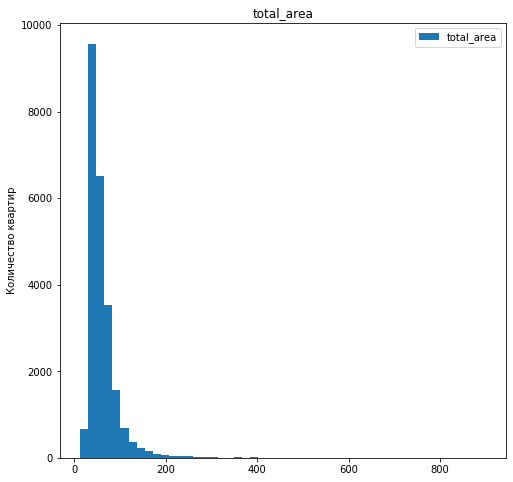

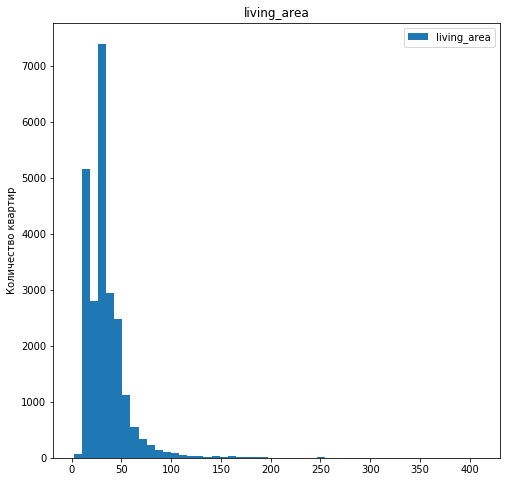

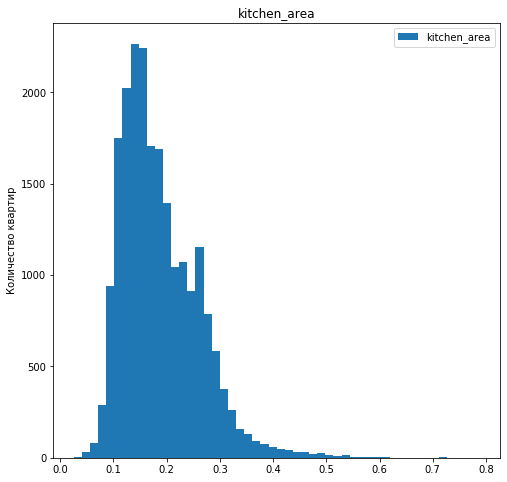

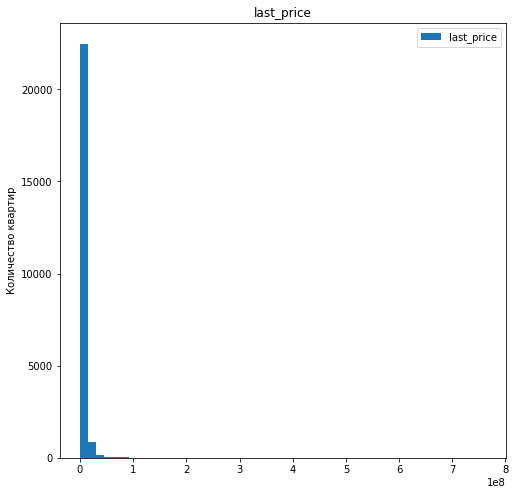

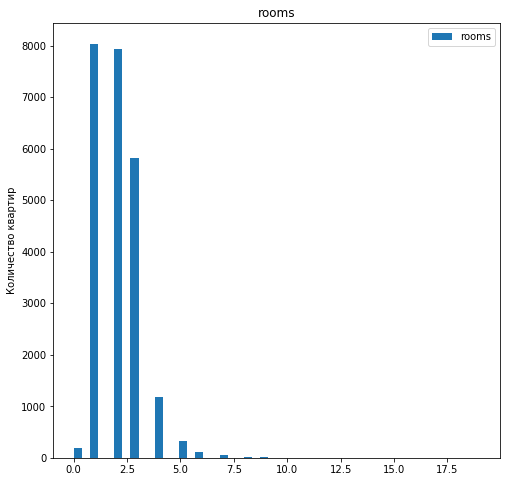

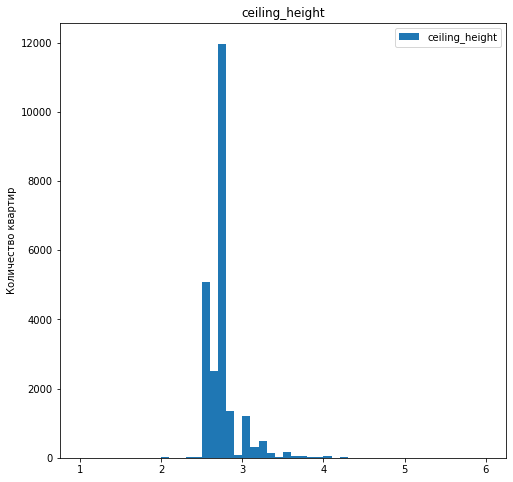

In [53]:
data1=df[["total_area", "living_area","kitchen_area","last_price","rooms","ceiling_height"]]
for i in data1:
    data1.plot(y=i, title=i, kind='hist', bins=50, figsize=(8,8))
    plt.ylabel("Количество квартир")
   

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Здорово, что получилось применить автоматизацию построения графиков 👍
    
Теперь в нужный момент мы сможем применить данный инструмент.
    
</div>

### Исследование времени продажи квартиры

Построим гистограмму для столбца days_exposition

Text(0.5, 0, 'Количество квартир')

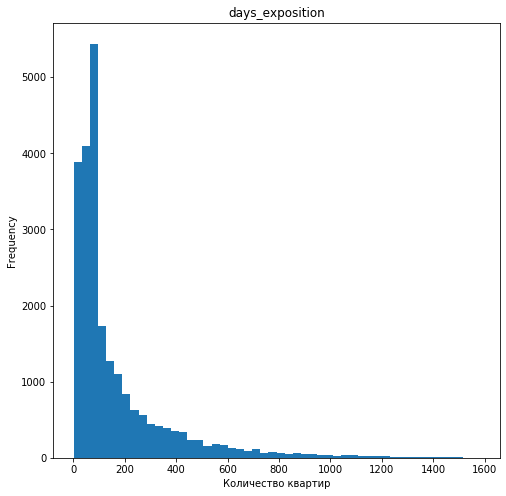

In [54]:
df['days_exposition'].plot(title='days_exposition', kind='hist', bins=50, figsize=(8,8))
plt.xlabel("Количество квартир")

Посчитаем среднее и медиану. Выведем диаграмму размаха. 

count    23670.000000
mean       169.382721
std        206.591617
min          1.000000
25%         45.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

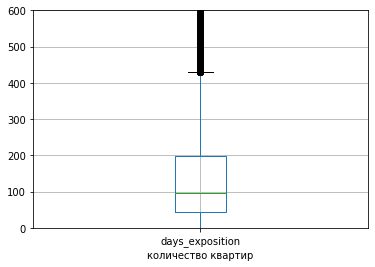

In [55]:
df.boxplot('days_exposition')
plt.ylim(0, 600)
plt.xlabel("количество квартир")
df['days_exposition'].describe()

Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

Медианным временем продажи квартиры является 95 дней в среднем нормальным значением является - от 45 до 200 дней. Если квартира продается более 200 дней это достаточно долго, более 400 дней необычно долго. Слишком быстрой можно считать продажу квартиры менее чем за 45 дней. 

## Удалим редкие и выбивающиеся значения

### Проанализируем столбец total_images

count    23670.000000
mean         9.858724
std          5.680234
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

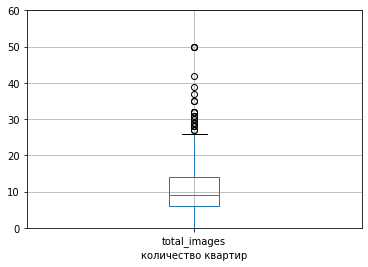

In [56]:
df.boxplot('total_images')
plt.ylim(0, 60)
plt.xlabel("количество квартир")
df['total_images'].describe()

Text(0, 0.5, 'Количество квартир')

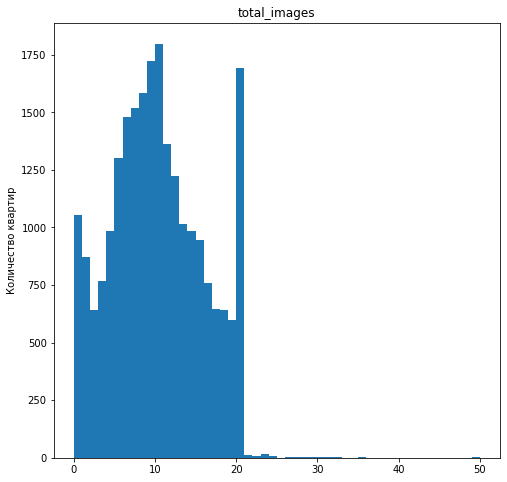

In [57]:
df['total_images'].plot(title='total_images', kind='hist', bins=50, figsize=(8,8))
plt.ylabel("Количество квартир")

Гистрограмма отражает нормальное распределение, но в районе 22 и 0 есть горбы, а также значения свыше 25 уже очень редки. Уберем значения свыше 25 фотографий и с 0 фотографий.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Обрати внимание, что наши действия повторяются с точки зрения построения графиков.
    
Это говорит о том, что мы можем создать функцию, которая будет выполнять все действия за нас.
    
Тем самым мы сможем оптимизировать свой код и проект целиком.
    
</div>

In [58]:
df_total_images_norm=df.query('total_images>0 and total_images <25')
display(df_total_images_norm)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,metr_price,year,month,weekday,floor_category,relationship_area
0,20,13000000.0,108.00,2019-03-07,3,2.700000,16,51.0,8,True,...,482.0,2.0,755.0,95.0,120370.370370,2019,3,3,другой,0.472222
1,7,3350000.0,40.40,2018-12-04,1,2.726502,11,18.6,1,True,...,0,0.0,0,81.0,82920.792079,2018,12,1,первый,0.460396
2,10,5196000.0,56.00,2015-08-20,2,2.726502,5,34.3,4,True,...,90.0,2.0,574.0,558.0,92785.714286,2015,8,3,другой,0.612500
4,2,10000000.0,100.00,2018-06-19,2,3.030000,14,32.0,13,True,...,112.0,1.0,48.0,121.0,100000.000000,2018,6,1,другой,0.320000
5,10,2890000.0,30.40,2018-09-10,1,2.726502,12,14.4,5,True,...,0,NaN,0,55.0,95065.789474,2018,9,0,другой,0.473684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.700000,5,73.3,3,True,...,796.0,3.0,381.0,95.0,72490.845228,2017,3,1,другой,0.547792
23695,14,3100000.0,59.00,2018-01-15,3,2.726502,5,38.0,4,True,...,0,NaN,0,45.0,52542.372881,2018,1,0,другой,0.644068
23696,18,2500000.0,56.70,2018-02-11,2,2.726502,3,29.7,1,True,...,0,NaN,0,95.0,44091.710758,2018,2,6,первый,0.523810
23697,13,11475000.0,76.75,2017-03-28,2,3.000000,17,30.0,12,True,...,173.0,3.0,196.0,602.0,149511.400651,2017,3,1,другой,0.390879


Построим гистограмму по новым данным 

22586

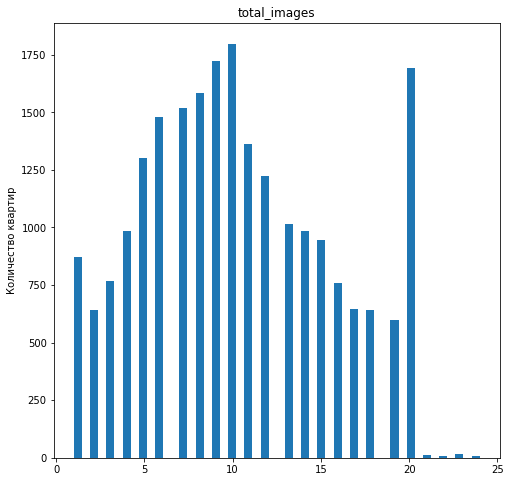

In [59]:
df_total_images_norm['total_images'].plot(title='total_images', kind='hist', bins=50, figsize=(8,8))
plt.ylabel("Количество квартир")
len(df_total_images_norm)

Выглядит гораздо ближе к нормальному распределению, да и сильно много данных мы не потеряли. 

### Проанализируем столбец last_price

count    2.258600e+04
mean     6.593119e+06
std      1.109213e+07
min      1.219000e+04
25%      3.450000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

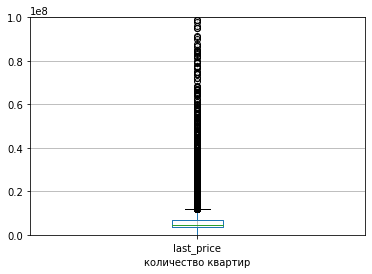

In [60]:
df_total_images_norm.boxplot('last_price')
plt.ylim(0, 100000000)
plt.xlabel("количество квартир")
df_total_images_norm['last_price'].describe()

Разброс цен на квартиры очень большой. При этом я бы не стал считать выбросами очень дорогие квартиры,
а вот слишком дешевые выглядят подозрительно.Самая дешевая квартира стоит чуть больше 12000, такие цены врятли возможно даже для Питера)

Text(0, 0.5, 'Количество квартир')

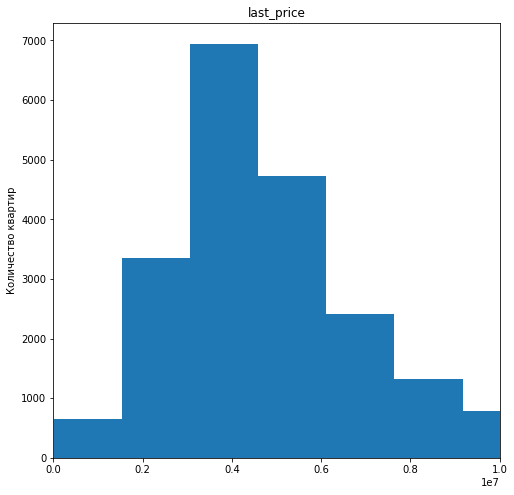

In [61]:
df_total_images_norm['last_price'].plot(title='last_price', kind='hist', bins=500, figsize=(8,8))
plt.xlim(0, 10000000)
plt.ylabel("Количество квартир")

Получается, что есть сегмент очень дешевых квартир и очень дорогих. В дешевом сегменте чаще всего встречается цена 400000, 
а все, что стоит меньше 180000 выглядит подозрительно. 

In [62]:
df_price_min=df_total_images_norm.query('last_price>180000')
display(df_price_min)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,metr_price,year,month,weekday,floor_category,relationship_area
0,20,13000000.0,108.00,2019-03-07,3,2.700000,16,51.0,8,True,...,482.0,2.0,755.0,95.0,120370.370370,2019,3,3,другой,0.472222
1,7,3350000.0,40.40,2018-12-04,1,2.726502,11,18.6,1,True,...,0,0.0,0,81.0,82920.792079,2018,12,1,первый,0.460396
2,10,5196000.0,56.00,2015-08-20,2,2.726502,5,34.3,4,True,...,90.0,2.0,574.0,558.0,92785.714286,2015,8,3,другой,0.612500
4,2,10000000.0,100.00,2018-06-19,2,3.030000,14,32.0,13,True,...,112.0,1.0,48.0,121.0,100000.000000,2018,6,1,другой,0.320000
5,10,2890000.0,30.40,2018-09-10,1,2.726502,12,14.4,5,True,...,0,NaN,0,55.0,95065.789474,2018,9,0,другой,0.473684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.700000,5,73.3,3,True,...,796.0,3.0,381.0,95.0,72490.845228,2017,3,1,другой,0.547792
23695,14,3100000.0,59.00,2018-01-15,3,2.726502,5,38.0,4,True,...,0,NaN,0,45.0,52542.372881,2018,1,0,другой,0.644068
23696,18,2500000.0,56.70,2018-02-11,2,2.726502,3,29.7,1,True,...,0,NaN,0,95.0,44091.710758,2018,2,6,первый,0.523810
23697,13,11475000.0,76.75,2017-03-28,2,3.000000,17,30.0,12,True,...,173.0,3.0,196.0,602.0,149511.400651,2017,3,1,другой,0.390879


Теперь попробуем убрать слишком дороги квартиры, чтобы они не сильно искажали общую картину.
Эти данные можно оставить для анализа сегмента "премиум". 

count    2.258500e+04
mean     6.593410e+06
std      1.109229e+07
min      4.300000e+05
25%      3.450000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

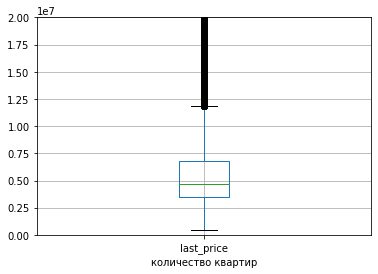

In [63]:
df_price_min.boxplot('last_price')
plt.ylim(0, 20000000)
plt.xlabel("количество квартир")
df_price_min['last_price'].describe()

Медиана по-прежнему в районе 4,65 млн, однако максимальное значение в выборке достигает 763 млн, а разбррос данных более 11 млн. Попробуем убрать значения, которые выходят за рамки 75%. 

In [64]:
df_price_max=df_price_min.query('last_price<6.800000e+06')
display(df_price_max)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,metr_price,year,month,weekday,floor_category,relationship_area
1,7,3350000.0,40.40,2018-12-04,1,2.726502,11,18.60,1,True,...,0,0.0,0,81.0,82920.792079,2018,12,1,первый,0.460396
2,10,5196000.0,56.00,2015-08-20,2,2.726502,5,34.30,4,True,...,90.0,2.0,574.0,558.0,92785.714286,2015,8,3,другой,0.612500
5,10,2890000.0,30.40,2018-09-10,1,2.726502,12,14.40,5,True,...,0,NaN,0,55.0,95065.789474,2018,9,0,другой,0.473684
6,6,3700000.0,37.30,2017-11-02,1,2.726502,26,10.60,6,True,...,0,0.0,0,155.0,99195.710456,2017,11,3,другой,0.284182
8,20,2900000.0,33.16,2018-05-23,1,2.726502,27,15.43,26,True,...,0,NaN,0,189.0,87454.764777,2018,5,2,другой,0.465320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,2,1350000.0,30.00,2017-07-07,1,2.726502,5,17.50,4,True,...,0,NaN,0,413.0,45000.000000,2017,7,4,другой,0.583333
23693,9,4600000.0,62.40,2016-08-05,3,2.600000,9,40.00,8,True,...,352.0,1.0,675.0,239.0,73717.948718,2016,8,4,другой,0.641026
23695,14,3100000.0,59.00,2018-01-15,3,2.726502,5,38.00,4,True,...,0,NaN,0,45.0,52542.372881,2018,1,0,другой,0.644068
23696,18,2500000.0,56.70,2018-02-11,2,2.726502,3,29.70,1,True,...,0,NaN,0,95.0,44091.710758,2018,2,6,первый,0.523810


Text(0, 0.5, 'Количество квартир')

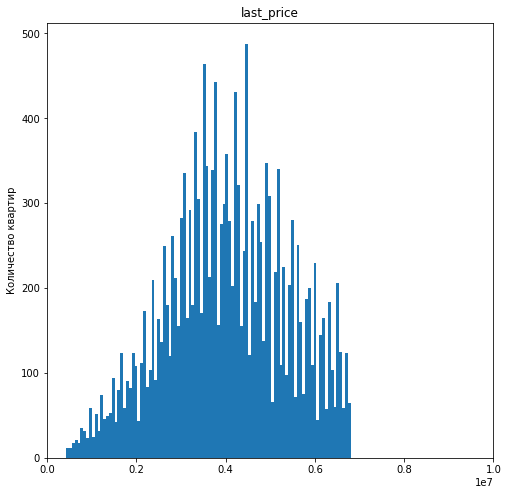

In [65]:
df_price_max['last_price'].plot(title='last_price', kind='hist', bins=100, figsize=(8,8))
plt.xlim(0, 10000000)
plt.ylabel("Количество квартир")

Выглядит уже лучше, однако правая часть диаграммы обрезана. Попробуем расширить ограничение. 

Text(0, 0.5, 'Количество квартир')

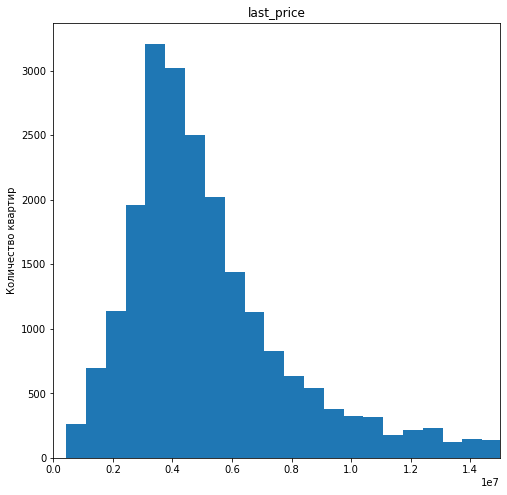

In [66]:
df_price_max2=df_price_min.query('last_price<6.800000e+07')
df_price_max2['last_price'].plot(title='last_price', kind='hist', bins=100, figsize=(8,8))
plt.xlim(0, 15000000)
plt.ylabel("Количество квартир")

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Чтобы нам в ручную не задавать параметр `range` мы можем посмотреть в открытом доступе  – как считать интерквартильный размах для нижнего и верхнего уровня нормального распределения.
    
</div>

Исходя из графика квартиры с ценой более 11 млн вполне можно считать сегментом "премиум", ограничимся этим значением по цене.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,metr_price,year,month,weekday,floor_category,relationship_area
1,7,3350000.0,40.40,2018-12-04,1,2.726502,11,18.6,1,True,...,0,0.0,0,81.0,82920.792079,2018,12,1,первый,0.460396
2,10,5196000.0,56.00,2015-08-20,2,2.726502,5,34.3,4,True,...,90.0,2.0,574.0,558.0,92785.714286,2015,8,3,другой,0.612500
4,2,10000000.0,100.00,2018-06-19,2,3.030000,14,32.0,13,True,...,112.0,1.0,48.0,121.0,100000.000000,2018,6,1,другой,0.320000
5,10,2890000.0,30.40,2018-09-10,1,2.726502,12,14.4,5,True,...,0,NaN,0,55.0,95065.789474,2018,9,0,другой,0.473684
6,6,3700000.0,37.30,2017-11-02,1,2.726502,26,10.6,6,True,...,0,0.0,0,155.0,99195.710456,2017,11,3,другой,0.284182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,9,4600000.0,62.40,2016-08-05,3,2.600000,9,40.0,8,True,...,352.0,1.0,675.0,239.0,73717.948718,2016,8,4,другой,0.641026
23694,9,9700000.0,133.81,2017-03-21,3,3.700000,5,73.3,3,True,...,796.0,3.0,381.0,95.0,72490.845228,2017,3,1,другой,0.547792
23695,14,3100000.0,59.00,2018-01-15,3,2.726502,5,38.0,4,True,...,0,NaN,0,45.0,52542.372881,2018,1,0,другой,0.644068
23696,18,2500000.0,56.70,2018-02-11,2,2.726502,3,29.7,1,True,...,0,NaN,0,95.0,44091.710758,2018,2,6,первый,0.523810


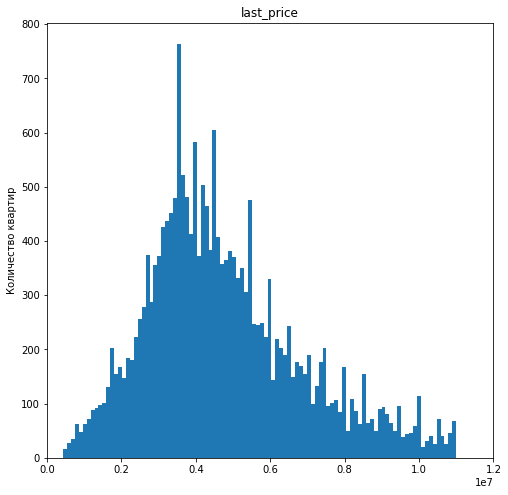

In [67]:
df_price_max3=df_price_min.query('last_price<11000000')
df_price_max3['last_price'].plot(title='last_price', kind='hist', bins=100, figsize=(8,8))
plt.xlim(0, 12000000)
plt.ylabel("Количество квартир")
display(df_price_max3)

Разброс гораздо ближе к нормальному распредлению. Думаю, что для дальнейшего анализа такие данные подойдут.
Посмотрим сколько % данных мы потеряли.

In [68]:
def procent_lost (data1, data2):
    a=len(data1)-len(data2)
    lost=a/len(data1)*100
    return lost
    print(lost)
          
procent_lost(df, df_price_max3)

14.102239121250529

14% потерь выглядит приемлимо. Зато данные стали более релевантными

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Конечно 14% на самом деле много 😊
    
Ориентировочно 1–2% допустимо потерять, но естественно всё зависит от самой задачи. 
    
</div>

### Проанализируем столбец total_area

count    20332.000000
mean        52.827270
std         18.518705
min         12.000000
25%         39.000000
50%         49.000000
75%         63.000000
max        201.500000
Name: total_area, dtype: float64

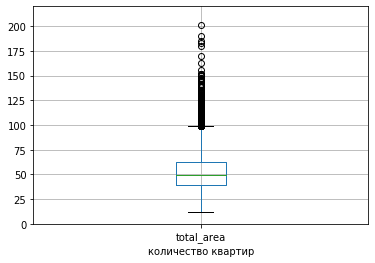

In [69]:
df_price_max3.boxplot('total_area')
plt.ylim(0, 220)
plt.xlabel("количество квартир")
df_price_max3['total_area'].describe()

Квартира размером в 12 м2 больше похожа на собачью конуру, но к сожалению такие квартиры на рынке есть, поэтому отбросим только
слишком большие значения.

In [70]:
df_norm_total_area=df_price_max3.query('total_area<100')
display(df_norm_total_area)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,metr_price,year,month,weekday,floor_category,relationship_area
1,7,3350000.0,40.4,2018-12-04,1,2.726502,11,18.6,1,True,...,0,0.0,0,81.0,82920.792079,2018,12,1,первый,0.460396
2,10,5196000.0,56.0,2015-08-20,2,2.726502,5,34.3,4,True,...,90.0,2.0,574.0,558.0,92785.714286,2015,8,3,другой,0.612500
5,10,2890000.0,30.4,2018-09-10,1,2.726502,12,14.4,5,True,...,0,NaN,0,55.0,95065.789474,2018,9,0,другой,0.473684
6,6,3700000.0,37.3,2017-11-02,1,2.726502,26,10.6,6,True,...,0,0.0,0,155.0,99195.710456,2017,11,3,другой,0.284182
7,5,7915000.0,71.6,2019-04-18,2,2.726502,24,30.0,22,True,...,0,0.0,0,95.0,110544.692737,2019,4,3,другой,0.418994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,2,1350000.0,30.0,2017-07-07,1,2.726502,5,17.5,4,True,...,0,NaN,0,413.0,45000.000000,2017,7,4,другой,0.583333
23693,9,4600000.0,62.4,2016-08-05,3,2.600000,9,40.0,8,True,...,352.0,1.0,675.0,239.0,73717.948718,2016,8,4,другой,0.641026
23695,14,3100000.0,59.0,2018-01-15,3,2.726502,5,38.0,4,True,...,0,NaN,0,45.0,52542.372881,2018,1,0,другой,0.644068
23696,18,2500000.0,56.7,2018-02-11,2,2.726502,3,29.7,1,True,...,0,NaN,0,95.0,44091.710758,2018,2,6,первый,0.523810


Text(0, 0.5, 'Количество квартир')

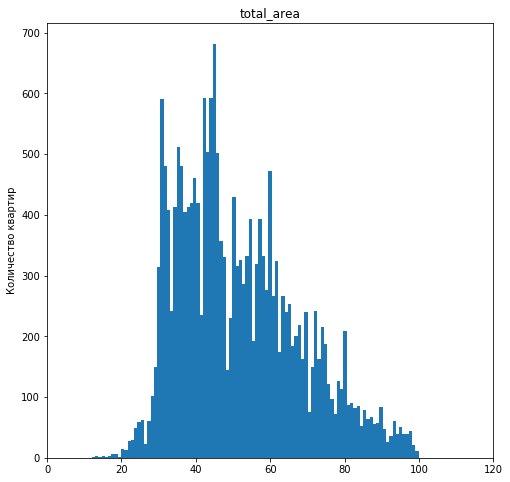

In [71]:
df_norm_total_area['total_area'].plot(title='total_area', kind='hist', bins=100, figsize=(8,8))
plt.xlim(0, 120)
plt.ylabel("Количество квартир")

Выглядит красиво, посмотрим сколько данных мы потеряли. 

In [72]:
procent_lost(df_price_max3, df_norm_total_area)

1.942750344284871

Меньше 2%! Это совсем не страшно) 

### Проанализируем столбец rooms

count    19937.00000
mean         1.87937
std          0.86524
min          0.00000
25%          1.00000
50%          2.00000
75%          3.00000
max          6.00000
Name: rooms, dtype: float64

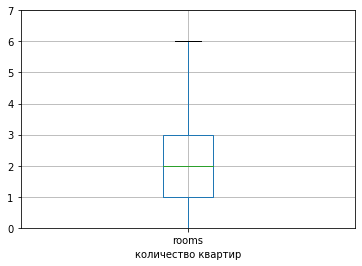

In [73]:
df_norm_total_area.boxplot('rooms')
plt.ylim(0, 7)
plt.xlabel("количество квартир")
df_norm_total_area['rooms'].describe()

Иметь 6 комнат жирно, но разумно, а вот квартир совсем без комнат быть не может. Уберем все квартиры с 0 комнат.

In [74]:
df_norm_rooms=df_norm_total_area.query('rooms==0')
display(df_norm_rooms)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,metr_price,year,month,weekday,floor_category,relationship_area
144,1,2450000.0,27.00,2017-03-30,0,2.726502,24,15.50,2,True,...,0,NaN,0,181.0,90740.740741,2017,3,3,другой,0.574074
349,4,2320000.0,25.00,2017-09-27,0,2.726502,14,17.00,1,True,...,0,NaN,0,45.0,92800.000000,2017,9,2,первый,0.680000
440,8,2480000.0,27.11,2018-03-12,0,2.726502,17,24.75,4,True,...,0,2.0,982.0,64.0,91479.158982,2018,3,0,другой,0.912947
608,2,1850000.0,25.00,2019-02-20,0,2.726502,10,30.00,7,True,...,0,0.0,0,29.0,74000.000000,2019,2,2,другой,1.200000
697,12,2500000.0,24.10,2017-12-01,0,2.750000,25,17.50,21,True,...,0,NaN,0,201.0,103734.439834,2017,12,4,другой,0.726141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22877,2,4280000.0,28.00,2017-10-26,0,2.700000,19,18.00,10,True,...,0,1.0,415.0,151.0,152857.142857,2017,10,3,другой,0.642857
23210,7,3200000.0,26.00,2017-09-01,0,2.726502,25,18.00,16,True,...,0,1.0,623.0,14.0,123076.923077,2017,9,4,другой,0.692308
23554,15,3350000.0,26.00,2018-09-07,0,2.726502,19,30.00,8,True,...,0,2.0,112.0,31.0,128846.153846,2018,9,4,другой,1.153846
23592,10,1450000.0,29.00,2017-11-11,0,2.726502,9,18.00,8,True,...,0,NaN,0,82.0,50000.000000,2017,11,5,другой,0.620690


Всего 179 значений, можно спокойно удалять.

### Проанализируем столбец ceiling_height

count    19758.000000
mean         2.696545
std          0.175285
min          1.000000
25%          2.600000
50%          2.726502
75%          2.726502
max          5.300000
Name: ceiling_height, dtype: float64

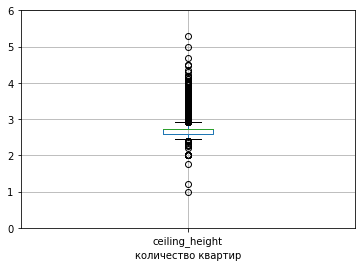

In [75]:
df_norm=df_norm_total_area.query('rooms>0')
df_norm.boxplot('ceiling_height')
plt.ylim(0, 6)
plt.xlabel("количество квартир")
df_norm['ceiling_height'].describe()

Квартиры с потолками выше 5 м наверняка существуют, а вот квартиры с потолками меньше 2 м маловероятны. Лучше их убрать.

In [76]:
df_norm2=df_norm.query('ceiling_height>2')
display(df_norm2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,metr_price,year,month,weekday,floor_category,relationship_area
1,7,3350000.0,40.4,2018-12-04,1,2.726502,11,18.6,1,True,...,0,0.0,0,81.0,82920.792079,2018,12,1,первый,0.460396
2,10,5196000.0,56.0,2015-08-20,2,2.726502,5,34.3,4,True,...,90.0,2.0,574.0,558.0,92785.714286,2015,8,3,другой,0.612500
5,10,2890000.0,30.4,2018-09-10,1,2.726502,12,14.4,5,True,...,0,NaN,0,55.0,95065.789474,2018,9,0,другой,0.473684
6,6,3700000.0,37.3,2017-11-02,1,2.726502,26,10.6,6,True,...,0,0.0,0,155.0,99195.710456,2017,11,3,другой,0.284182
7,5,7915000.0,71.6,2019-04-18,2,2.726502,24,30.0,22,True,...,0,0.0,0,95.0,110544.692737,2019,4,3,другой,0.418994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,2,1350000.0,30.0,2017-07-07,1,2.726502,5,17.5,4,True,...,0,NaN,0,413.0,45000.000000,2017,7,4,другой,0.583333
23693,9,4600000.0,62.4,2016-08-05,3,2.600000,9,40.0,8,True,...,352.0,1.0,675.0,239.0,73717.948718,2016,8,4,другой,0.641026
23695,14,3100000.0,59.0,2018-01-15,3,2.726502,5,38.0,4,True,...,0,NaN,0,45.0,52542.372881,2018,1,0,другой,0.644068
23696,18,2500000.0,56.7,2018-02-11,2,2.726502,3,29.7,1,True,...,0,NaN,0,95.0,44091.710758,2018,2,6,первый,0.523810


Посчитаем количество потерянных данных. 

In [77]:
procent_lost(df_norm, df_norm2)

0.06073489219556636

Потери небольшие, а данные стали чище. 

### Проанализируем столбец living_area

count    19746.000000
mean        29.636295
std         11.548394
min          2.000000
25%         18.400000
50%         30.000000
75%         37.000000
max         80.000000
Name: living_area, dtype: float64

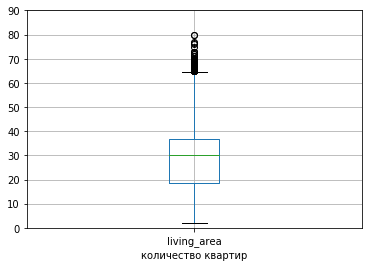

In [78]:
df_norm2.boxplot('living_area')
plt.ylim(0, 90)
plt.xlabel("количество квартир")
df_norm2['living_area'].describe()

Количество значений за пределами усов невелико, поэтому оставим этот столбец без изменений

### Проанализируем столбец days_exposition

Распределение в этом столбце должно быть похоже на распредление Пуансона. Построим гистограмму

count    19746.000000
mean       163.001215
std        197.155309
min          1.000000
25%         45.000000
50%         95.000000
75%        192.000000
max       1580.000000
Name: days_exposition, dtype: float64

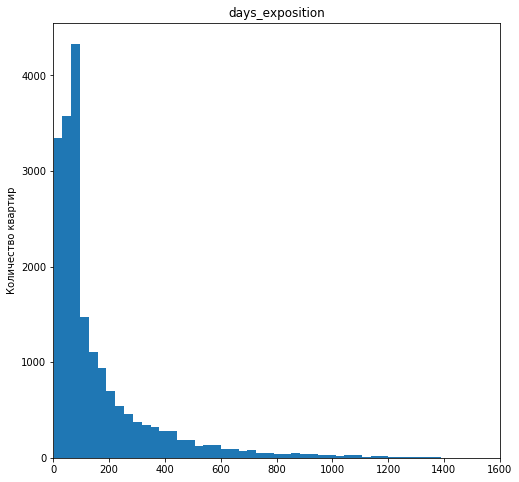

In [79]:
df_norm2['days_exposition'].plot(title='days_exposition', kind='hist', bins=50, figsize=(8,8))
plt.xlim(0, 1600)
plt.ylabel("Количество квартир")
df_norm2['days_exposition'].describe()

Дейсвительно распределение похоже. Посмотрим на диаграмму размаха. 

count    19746.000000
mean       163.001215
std        197.155309
min          1.000000
25%         45.000000
50%         95.000000
75%        192.000000
max       1580.000000
Name: days_exposition, dtype: float64

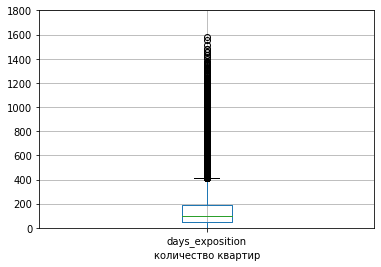

In [80]:
df_norm2.boxplot('days_exposition')
plt.ylim(0, 1800)
plt.xlabel("количество квартир")
df_norm2['days_exposition'].describe()

После чистки датафрейма медианное значение осталось прежним, а это значит сильно много мы не удалили. При этом количество слишком долго продающихся квартир велико. Попробуем убрать квартиры, которые продаются более 600 дней. 

In [81]:
df_norm3=df_norm2.query('days_exposition<600')

In [82]:
procent_lost(df_norm2, df_norm3)

4.542692190823458

Получилось более 4,5% выглядит много, но зато эти данные сильно портят статистику. Лучше их убрать.

In [83]:
### Проанализируем столбец floor

### Посчитаем количество потерянных данных 

In [84]:
procent_lost(df, df_norm3)

20.367553865652724

## Вывод 3

После все преобразований мы потеряли 20% данных. Это кажется довольно большим числом, однако больше всего данных мы удалили 
из-за слишком большой цены, тоесть в реальности мы анализируем более массовый сегмент. 20% оставшихся данных в основном соответсвуют сегменту "премиум" и их можно анализировать отдельно. 

# Ответы на вопросы 

"Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, 
числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, 
месяца и года. 

### Изучим зависимость цен на квартиры от общей площади

0.6537711884179125


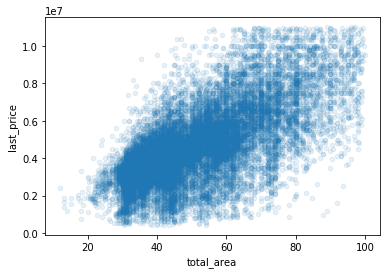

In [85]:
df_norm3.plot(x='total_area', y='last_price', kind='scatter', alpha=0.1) 
print(df['total_area'].corr(df['last_price']))

С увеличением общей площади, цена растет. Коэффициент корреляции достаточно высокий. 

### Изучим зависимость цен на квартиры от количества комнат

In [86]:
print(df['rooms'].corr(df['last_price']))

0.3634870594236173


Связь между ценой и количеством комнат есть, но не слишком сильная.

### Изучим зависимость цен на квартиры от этажа квартиры

Получим срезы данных для первого и последнего этажей

In [87]:
floor_first=df_norm3.query('floor_category == "первый"') 
floor_last=df_norm3.query('floor_category == "последний"')

Построим гистограммы 

0.02651967059918974


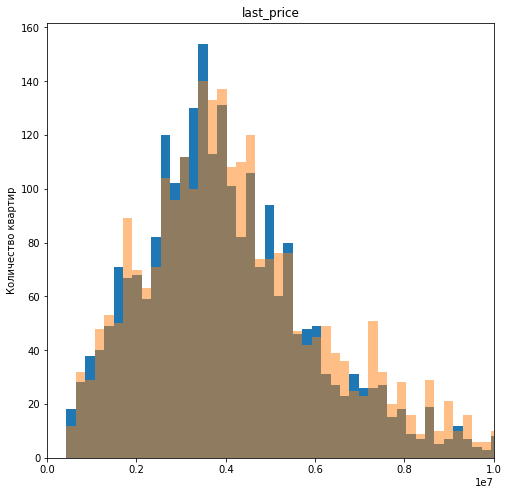

In [88]:
floor_first['last_price'].plot(title='last_price', kind='hist', bins=50, figsize=(8,8))
plt.xlim(0, 10000000)
plt.ylabel("Количество квартир")
floor_first['last_price'].describe()
floor_last['last_price'].plot(title='last_price', kind='hist', bins=50, figsize=(8,8), alpha=0.5)
plt.xlim(0, 10000000)
plt.ylabel("Количество квартир")
print(df['floor'].corr(df['last_price']))

Можно сказать, что цены для первого и последнего этажей различюется незначительно, но квартиры на последнем этаже стоят чуть 
дороже.

### Изучим зависимость цен на квартиры от удаленности от центра

-0.20703684658084498


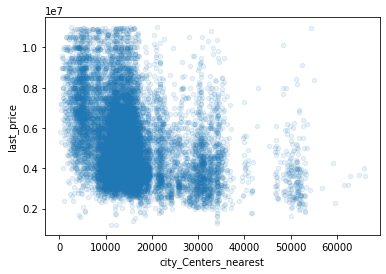

In [89]:
df_norm3.plot(x='city_Centers_nearest', y='last_price', kind='scatter', alpha=0.1) 
print(df['city_Centers_nearest'].corr(df['last_price']))

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

В том числе можно было построить матрицу корреляции между нужными переменными.
    
И визуализировать её с помощью метода `heatmap` из библиотеки `seaborn`.
    
</div>

Зависимость отрицательная, тоесть чем дальше квартира находится от центра тем стоит дешевле

### Изучим зависимость цен на квартиры от дня недели, года и месяца публикации объявления о продаже

                year     month   weekday  last_price
year        1.000000 -0.290483 -0.011908    0.036661
month      -0.290483  1.000000  0.006814   -0.001251
weekday    -0.011908  0.006814  1.000000   -0.009880
last_price  0.036661 -0.001251 -0.009880    1.000000


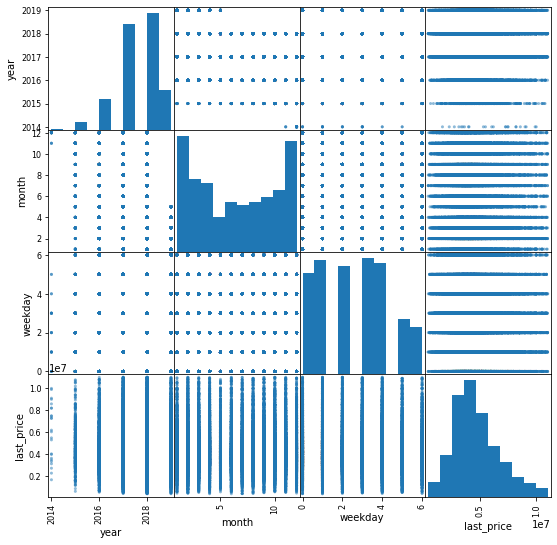

In [90]:
df_time_pudlication=df_norm3[['year','month','weekday', 'last_price' ]]
pd.plotting.scatter_matrix(df_time_pudlication, figsize=(9, 9)) 
print(df_time_pudlication.corr())

Можно сказать, что цена на квартиры практически не зависит от времени публикации объявления. 

"Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в 
этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени 
в столбце 'locality_name'. "

Выведем  10 населенных пунктов с наибольшим числом объявлений

In [91]:
print(df_norm3['locality_name'].value_counts().head(10))

Санкт-Петербург      11938
посёлок Мурино         464
посёлок Шушары         393
Всеволожск             350
посёлок Парголово      302
Пушкин                 294
Колпино                283
Гатчина                269
деревня Кудрово        243
Выборг                 205
Name: locality_name, dtype: int64


Посчитаем среднюю цену квадратного метра для каждого населенного пункта

In [92]:
# Пыитался сделать через цикл и не получиось. Пожалуйста, объясните, как сделать правильно. 
#list_locality_name=["Санкт-Петербург", "посёлок Мурино","посёлок Шушары","Всеволожск","посёлок Парголово","Пушкин",
                    #"Колпино","Гатчина","деревня Кудрово","Выборг"] 

#for i in list_locality_name:
    #df_locality_name_10=df_norm3.query('locality_name==@list_locality_name')
   # print(df_locality_name_10)

Посчитаем среднюю цену квадратного метра для каждого населенного пункта

In [93]:
# это можно сделать через цикл или функцию, но я так и не додумался как((. Уже нету времени думать, так как отстаю на 2 недели.

df_locality_name_1=df_norm3.query('locality_name=="Санкт-Петербург"').mean()
df_locality_name_2=df_norm3.query('locality_name=="посёлок Мурино"').mean()
df_locality_name_3=df_norm3.query('locality_name=="посёлок Шушары"').mean()
df_locality_name_4=df_norm3.query('locality_name=="Всеволожск"').mean()
df_locality_name_5=df_norm3.query('locality_name=="посёлок Парголово"').mean()
df_locality_name_6=df_norm3.query('locality_name=="Пушкин"').mean()
df_locality_name_7=df_norm3.query('locality_name=="Колпино"').mean()
df_locality_name_8=df_norm3.query('locality_name=="Гатчина"').mean()
df_locality_name_9=df_norm3.query('locality_name=="деревня Кудрово"').mean()
df_locality_name_10=df_norm3.query('locality_name=="Выборг"').mean()

list=[df_locality_name_1['metr_price'], df_locality_name_2['metr_price'], df_locality_name_3['metr_price'] 
      ,df_locality_name_4['metr_price'],df_locality_name_5['metr_price'],df_locality_name_6['metr_price']
      ,df_locality_name_7['metr_price']
      ,df_locality_name_8['metr_price'], df_locality_name_9['metr_price'], df_locality_name_10['metr_price']]

a=min(list)
b=max(list)

print(a,b)
print(list)
print()
print("Населенный пункт с самой низкой стоимостью жилья -", "Выборг")
print("Населенный пункт с самой высокой стоимостью жилья -", "Санкт-Петербург")

58480.55182068421 105385.16382946895
[105385.16382946895, 85183.99892330759, 78763.9787017997, 67162.65865330958, 90210.76192381003, 100471.22733692468, 75385.89969306573, 68654.19166620236, 92152.5280799062, 58480.55182068421]

Населенный пункт с самой низкой стоимостью жилья - Выборг
Населенный пункт с самой высокой стоимостью жилья - Санкт-Петербург


"Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. 
Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. 
Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену 
для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. 
Определите границу, где график сильно меняется — это и будет центральная зона."

Создадим столбец с расстоянием до центра в километрах

In [94]:
df_Sant_Peterburg=df_norm3.query('locality_name=="Санкт-Петербург"')

In [95]:
df_Sant_Peterburg['centr_distance']=(df_Sant_Peterburg['city_Centers_nearest']/1000).astype(int)
print(df_Sant_Peterburg['centr_distance'])

2        13
7        11
9        15
10       13
15       14
         ..
23686    11
23687    16
23689    16
23690     6
23691     4
Name: centr_distance, Length: 11938, dtype: int64


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [96]:
#Не понял, как я должен правильно записывать с использованием loc. Из документации ничего не ясно. 

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Например вот так, оставил пример ниже. 
    
</div>

In [101]:
df_norm3.loc[df_norm3['locality_name'] == "Санкт-Петербург"]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,metr_price,year,month,weekday,floor_category,relationship_area
2,10,5196000.0,56.0,2015-08-20,2,2.726502,5,34.3,4,True,...,90.0,2.0,574.0,558.0,92785.714286,2015,8,3,другой,0.612500
7,5,7915000.0,71.6,2019-04-18,2,2.726502,24,30.0,22,True,...,0,0.0,0,95.0,110544.692737,2019,4,3,другой,0.418994
9,18,5400000.0,61.0,2017-02-26,3,2.500000,9,43.6,7,True,...,0,0.0,0,289.0,88524.590164,2017,2,6,другой,0.714754
10,5,5050000.0,39.6,2017-11-16,1,2.670000,12,20.3,3,True,...,310.0,2.0,553.0,137.0,127525.252525,2017,11,3,другой,0.512626
15,16,4650000.0,39.0,2017-11-18,1,2.726502,14,20.5,5,True,...,590.0,1.0,296.0,19.0,119230.769231,2017,11,5,другой,0.525641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23686,8,3300000.0,31.0,2017-04-29,1,2.550000,9,18.0,6,True,...,140.0,1.0,317.0,193.0,106451.612903,2017,4,5,другой,0.580645
23687,6,3200000.0,39.0,2017-12-16,1,2.726502,9,20.0,6,True,...,0,0.0,0,38.0,82051.282051,2017,12,5,другой,0.512821
23689,13,3550000.0,35.3,2018-02-28,1,2.860000,15,16.3,4,True,...,353.0,2.0,652.0,29.0,100566.572238,2018,2,2,другой,0.461756
23690,3,5500000.0,52.0,2018-07-19,2,2.726502,5,31.0,2,True,...,300.0,0.0,0,15.0,105769.230769,2018,7,3,другой,0.596154


Построим график зависимости средней цены квадратного метра от расстояния до центра

Text(0, 0.5, 'metr_price')

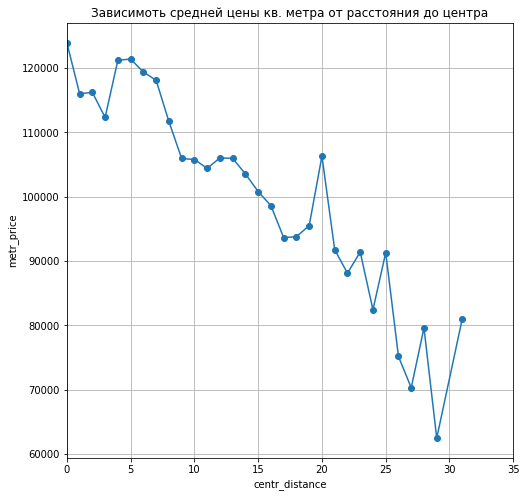

In [97]:
grup_centr_distance=df_Sant_Peterburg.groupby('centr_distance')['metr_price'].mean()
grup_centr_distance.plot(title="Зависимоть средней цены кв. метра от расстояния до центра",
style='o-', xlim=(0, 35), figsize = (8, 8), grid=True)
plt.ylabel("metr_price")
                                        

Границей центральной зоны города можно считать расстояние в 12 км, так как дальше цена резко падает. 

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Ориентировочно да, потому что дальше идёт в том числе спад и длительная стагнация стоимости.
    
</div>

"Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: 
площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры 
(число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от 
общих выводов по всему городу?"

Выделим данные с квартирами в центре города

In [98]:
df_Sant_Peterburg_cent_nearest=df_Sant_Peterburg.query('centr_distance<12')

Построим гистограммы

                total_area     floor  centr_distance  ceiling_height
total_area        1.000000 -0.068747       -0.293617        0.314848
floor            -0.068747  1.000000        0.278250       -0.139348
centr_distance   -0.293617  0.278250        1.000000       -0.454301
ceiling_height    0.314848 -0.139348       -0.454301        1.000000


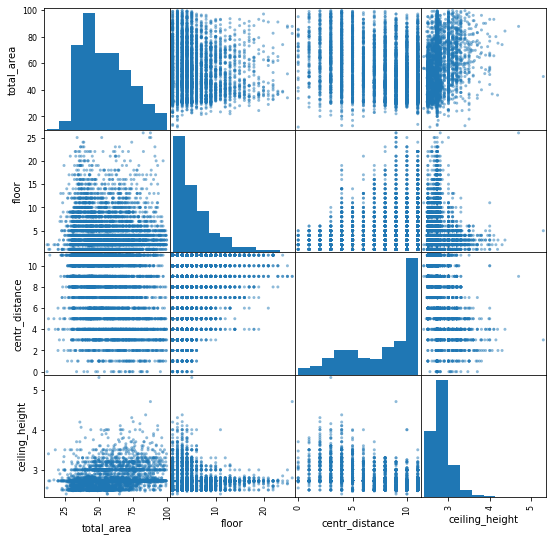

In [99]:
df_Sant_Peterburg_cent_nearest_1=df_Sant_Peterburg_cent_nearest[['total_area','floor','centr_distance', 'ceiling_height']]
pd.plotting.scatter_matrix(df_Sant_Peterburg_cent_nearest_1, figsize=(9, 9)) 
print(df_Sant_Peterburg_cent_nearest_1.corr())

In [100]:
df_Sant_Peterburg_cent_nearest2=df_Sant_Peterburg_cent_nearest[["floor", "centr_distance","days_exposition",
                                                                "last_price","rooms"]]
print('Кореляция по ближайшим к центру квартирам')
display(df_Sant_Peterburg_cent_nearest2.corr())
print('Кореляция по всему городу')
display(df_Sant_Peterburg[["floor", "centr_distance","days_exposition", "last_price","rooms"]].corr())

Кореляция по ближайшим к центру квартирам


,floor,centr_distance,days_exposition,last_price,rooms
floor,1.000000,0.278250,-0.020991,0.041297,-0.192512
centr_distance,0.278250,1.000000,-0.078139,-0.400188,-0.169371
days_exposition,-0.020991,-0.078139,1.000000,0.090871,0.084937
last_price,0.041297,-0.400188,0.090871,1.000000,0.458926
rooms,-0.192512,-0.169371,0.084937,0.458926,1.000000


Кореляция по всему городу


,floor,centr_distance,days_exposition,last_price,rooms
floor,1.000000,0.210920,-0.012819,0.070392,-0.194438
centr_distance,0.210920,1.000000,-0.045247,-0.326362,-0.119750
days_exposition,-0.012819,-0.045247,1.000000,0.058944,0.058729
last_price,0.070392,-0.326362,0.058944,1.000000,0.477780
rooms,-0.194438,-0.119750,0.058729,0.477780,1.000000


Небольшие количественные различия в зависимостях есть, но качественно выводы не отличаются. Цена все также в наибольшей 
степени зависит от количества комнат и удаленности от центра.

# Общий вывод

1. Для правильной замены данных на основе значений в других столбцах нужно проверять кореляцию между ними. Она может оказаться
гораздо слабее, чем на первый взгляд
2. Если нету гипотезы, как заменить данные, то лучше оставить данные как есть. 
3. В ходе работы мы обрезали 20% датафрейма, однако эти данные можно использовать для дальнейшего анализа в сегмента "премиум".
4. Наибольшее влияние на цену квартиры оказывает общая площадь, количество комнат и удаленность от центра, а коэффициенты кореляции Пирсона равны соответсвенно 0.65, 0.36 и -0.21. 
5. Разница в цене квартиры в зависимоти от этажа незначительная, но квартиры на перовом этаже стоят чуть дешевле.
6. Можно использовать циклы и функции для автоматизации циклов и удаления выбросов. Для построения графиков циклы и функции полезны, так как позволяют ускорить работы. Использование функций для удаления выбросов не всегда оправдано. Лучше потратить немного больше и более тщательно изучить датафрейм. Порой можно отсавить часть данных, которые с формальной точки зрения являются выбросами для большей точности анализа. 

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Выводы понятны и логичны, а самое главное подкреплены выявленными фактами.
       
В целом сам проект выполнен на хорошем уровне! На протяжении всей работы чувствуется глубина проработки задачи и это безусловный плюс для нас. Было использовано большое количество методов, которые будут помогать тебе в дальнейших проектах.
    
Не стоит забывать про оформление своей работы, это важный такой же важный этап. Рекомендую «не стесняться» использовать ячейки типа **markdown** там где нам необходимо отобразить свои размышления, в том числе с использованием дополнительной стилизации.
    
Успехов тебе в новых проектах! 
    
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Рекомендую посмотреть на дополнительную стилизацию ячеек типа **markdown**.
    
**Жирный**
*Курсив*
    
--- 

# Заголовок первого уровня

--- 
    
## Заголовок второго уровня
  
---  
Списки:
    
- один 
- два
- три
   
---
    
1. Раз
2. Раз раз
3. Раз два три
    
--- 
    
Отображение `переменных`

    
</div>

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [ ]  файлы изучены (выведены первые строки, метод info())
- [ ]  определены пропущенные значения
- [ ]  заполнены пропущенные значения
- [ ]  есть пояснение, какие пропущенные значения обнаружены
- [ ]  изменены типы данных
- [ ]  есть пояснение, в каких столбцах изменены типы и почему
- [ ]  посчитано и добавлено в таблицу: цена квадратного метра
- [ ]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [ ]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [ ]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [ ]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [ ]  построены гистограммы для каждого параметра
- [ ]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [ ]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [ ]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [ ]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [ ]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [ ]  в каждом этапе есть выводы
- [ ]  есть общий вывод